<a href="https://colab.research.google.com/github/tjquinn1/EconomicEcosystem/blob/main/Copy_of_JMA_Model_10March2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Sustainable Economic Growth Model
J M Applegate, Taylor Quinn   
8 March, 2021

In [1]:
%pip install plotly
%pip install "ipywidgets>=7.5"
%pip install rpy2
%load_ext rpy2.ipython
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from random import seed, gauss, randint
import csv
import random
import math
seed(1)

In [ ]:
%%R 
library(tidyverse)
library(ggthemes)
palette_ordered <- c('darkred', 'deepskyblue2', 'paleturquoise3', 'red3', 
                    'steelblue3', 'lightpink2', 'darkslategrey', 'cadetblue', 
                    'royalblue3', 'darkorange', 'palegreen3', 'navajowhite3')

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Error in library(ggthemes) : there is no package called ‘ggthemes’

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In system("timedatectl", intern = TRUE) :
R[write to console]: 
 
R[write to console]:  running command 'timedatectl' had status 1




Error in library(ggthemes) : there is no package called ‘ggthemes’


### Sustainable Economic Growth Model (SEG)
Starting with a small settlement which harvests some natural resource which is exported, thus earning imports.  
Two fundamental processes are import replacement and export expansion.  
Exports, $E$, equals imports, $I$. Total size of the economy is measured as size of consumption, $C$, and production, $P$, therefore $P + C$.
#### Import Replacement
Imports from $I$ flow to $P$ or $C$ proportionately.  
Imports are replaced at a rate $\rho$, where $\rho = (\rho_C + \rho_P) < 1$.  
$\rho$ is related to an economy's *dynamism*, involving untapped purchasing power, knowledge, diversity and inventiveness.  
If $\rho = 1$ then all imports are replaced each timestep, which is unrealistic.  
$\rho$ could also be modeled stochastically.    
Each timestep $\rho I$ imports are replaced and proportionately divided between $C$ and $P$, thus 
\begin{align}
\frac{dC}{dt} &= \rho I\frac{C}{C + P}\\
\frac{dP}{dt} &= \rho I\frac{P}{C + P} + 1.\\
\end{align}

*What expansion is being measured? Capacity? Past timestep quantitative flows?*  

$\rho I = X$, and increases in $C$ and $P$ are measured in $X$.  
$X$ is a function of numerous quantitative and qualitative aspects of an economy, just as $\rho.$      
If an economy was importing jam and decides to produce jam locally, then the economy still needs to import the components of jam (berries, sugar, pectin, jars).  
Jam is therefore berries, sugar, pectin and jars plus some industrious addition, $X$.  
This $X$, the value-add of jam production, is no longer imported, and $X$ is the quantity that translates to new imports.  
Note that $I$ and $E$ remain constant, but that $C$ and $P$, the settlements economic activity, increases.  
Both consumption and production imports can be novel, thus diversity in both consumption and production increase each timestep.

*How does economic diversity, $\delta = \delta_C + \delta_P$, increase? How does $\rho$ increase?*  

$\delta$ increases as a function of the increases in $C, P$ and a parameter $\gamma$ where $0 < \gamma < 1$ and $0 < \delta < \infty:$ as
\begin{equation}
\frac{d\delta}{dt} = \gamma  \rho  I.
\end{equation}

$\rho$ will increase with $\delta$ but has an upper limit less than 1, so perhaps model as a scaled logistic function.  
For now, $\rho$ is constant.

In [ ]:
# Initial conditions
C = 10
P = 20
I = 8
E = I

delta = 5
rho = .4
nu = .2
gamma = .1
steps = 20
alpha = 1.1
beta = 1.5

results = []
t = 1

while t <= steps:
    dCdt = rho * I * (C / (C + P))
    dPdt = rho * I * (P / (C + P))
    C += dCdt
    P += dPdt
    delta += gamma * rho * I
    
    day_results = {
        't': t,
        #'I': I,
        'E': E,
        'C': C,
        'P': P,
        'dCdt': dCdt,
        'dPdt': dPdt,
        'delta': delta,
        'rho': rho,
        'nu': nu,
    }
    results.append(day_results)
    t += 1 
df = pd.DataFrame(results)

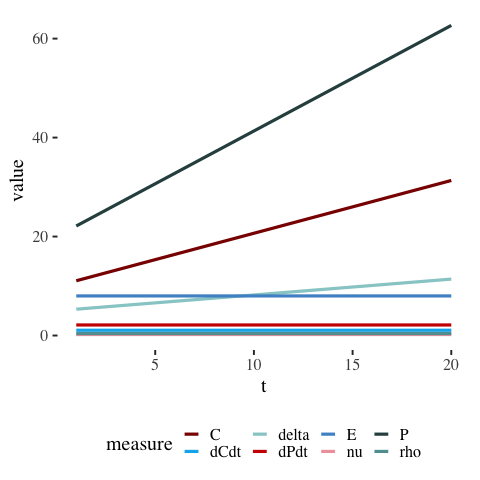

In [ ]:
%%R -i df
plot.data <- df %>% gather(measure, value, -t) #%>% 
    #mutate(category = ifelse(measure %in% c('E', 'C', 'P'), 'box', 
                             #ifelse(measure %in% c('dEdt', 'dCdt', 'dPdt'), 'changes', 'parameters')))
ggplot(plot.data, aes(x = t, y = value, color = measure)) + theme_tufte(base_size = 20) + 
    geom_line(size = 1.5) + 
    #facet_wrap(~ category) +
    scale_color_manual(values = palette_ordered) +
    theme(legend.position = 'bottom')

#### Export Expansion
Whenever there is an increase in production imports,
\begin{equation}
\frac{dP}{dt} > 0,
\end{equation}
production activity increases in one of two ways; either intensive, more of the same, or extensive, something innovative is produced.  
An intensive increase does not increase $\delta_P$ but an extensive increase does.  
The new imports are modified by a factor $\nu = (\nu_i + \nu_e) < 1$ for intensive and extensive processes.  
$\nu,$ like $\rho,$ is a function of diversity, untapped purchasing power, knowledge and inventiveness.

The increase in exports is 
\begin{equation}
\frac{dE}{dt} = \nu\left(\frac{dP}{dt}\right)_{t-1}
\end{equation}
which is translates to an increase in imports, which in turn is divided proportionatly between $C$ and $P$, thus
\begin{align}
\frac{dC}{dt} &= \frac{dE}{dt}\frac{C}{C + P}\\
\frac{dP}{dt} &= \frac{dE}{dt}\frac{P}{C + P}.\\
\end{align}
The economy's diversity, $\delta$, again increases according to the increase in exports modified by $\gamma:$
\begin{equation}
\frac{d\delta}{dt} = \gamma \frac{dE}{dt}.
\end{equation}

Like $\rho,$ $\nu$ will increase with $\delta$ but has an upper limit less than 1, so perhaps model as a logistic function.  
For now, $\nu$ is constant.

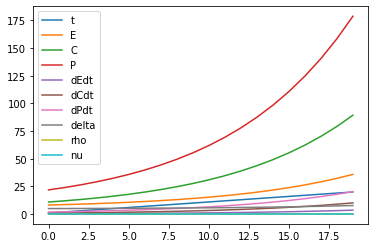

In [33]:
# Initial conditions
C = 10
P = 20
I = 8
E = I

delta = 5
rho = .4
nu = .2
gamma = .1
steps = 20
alpha = 1.1
beta = 1.5

results = []
t = 1

dPdt_previous = 1.2

while t <= steps:
    dEdt = nu * dPdt_previous
    E += dEdt
    I += dEdt
    dCdt += dEdt * (C / (C + P))
    dPdt += dEdt * (P / (C + P))
    C += dCdt
    P += dPdt
    dPdt_previous = dPdt
    delta += gamma * dEdt
    
    day_results = {
        't': t,
        #'I': I,
        'E': E,
        'C': C,
        'P': P,
        'dEdt': dEdt,
        'dCdt': dCdt,
        'dPdt': dPdt,
        'delta': delta,
        'rho': rho,
        'nu': nu,
    }
    results.append(day_results)
    t += 1 
df = pd.DataFrame(results)
df.plot()

In [32]:
%%R -i df
plot.data <- df %>% gather(measure, value, -t) #%>% 
    #mutate(category = ifelse(measure %in% c('E', 'C', 'P'), 'box', 
                             #ifelse(measure %in% c('dEdt', 'dCdt', 'dPdt'), 'changes', 'parameters')))
ggplot(plot.data, aes(x = t, y = value, color = measure)) + theme_tufte(base_size = 20) + 
    geom_line(size = 1.5) + 
    #facet_wrap(~ category) +
    scale_color_manual(values = palette_ordered) +
    theme(legend.position = 'bottom')

R[write to console]: Error in df %>% gather(measure, value, -t) : 
  could not find function "%>%"




Error in df %>% gather(measure, value, -t) : 
  could not find function "%>%"


#### Carrying Capacity
Each economy has a carrying capacity, $K$, which is a function of population, $N$.  
$K_C = \alpha N$ and $K_P = \beta N$.
These are upper limits on the sizes of $C$ and $P$, and $\beta > \alpha > 1.$

#### Parameter Updates
The import replacement rate parameter, $\rho$, is updated according to a logistic function
\begin{equation}
\rho = \frac{\rho_{max}}{1 + e^{(\delta_{mid} - \delta)}}
\end{equation}
where 
$\rho_{max} < 1$ and 
\begin{equation}
\delta_{mid} = \frac{\rho_{max}(K_C + K_P)}{2}.
\end{equation}

$\nu$ modifies the increase in production from a previous time step which represents a material flow in units of $X$. This material flow eventually makes it's way to either consumption or exports, but the increase in activity arising from that material flow leaves behind a residual increase in production, and $0 < \nu < 1.$ Represent as a logistic in $\delta$ like $\rho.$ What would $\nu_{max}$ represent?

\begin{array}{ |l|l|l| } 
\hline
\text{Parameter} & \text{Description} & \text{Range} \\
 \hline
 N & \text{the population of an economic unit} & N > 1 \\ 
 \text{steps} & \text{the number of timesteps to run simulation} & \text{steps} > 1 \\ 
 \alpha & \text{multiplies population to determine } K_P & \alpha > 1 \\ 
 \beta & \text{multiplies population to determine } K_C & \beta > 1 \\ 
 \rho & \text{the percentage of imports, both consumption and production, replaced in a given timestep} & 0 < \rho < \rho_{max} < 1 \\ 
 \nu & \text{the multiplier of new production activity, both intensive and extensive} & 0 < \nu < \nu_{max} < 1 \\ 
 \delta & \text{the diversity of goods and services produced in an economic unit} & \delta > 1 \\ 
 \gamma & \text{multiplies increases in the economy to determine increases in diversity} & 0 < \gamma < 1 \\ 
 \hline
\end{array}

In [27]:
def calc_K_c(alpha, N):
  return alpha * N

def calc_K_p(beta, N):
  return beta * N

def calc_rho(rho_max, delta_mid, delta):
  return rho_max / (1 + (math.exp(delta_mid - delta)))

def calc_rho_mid(K_c, K_p, rho_max):
  return (rho_max* (K_c + K_p)) / 2

def calc_N(N, dCdt, dPdt):
  return N + dCdt + dPdt

def dCdt_import(rho, I, C, P):
  return rho * I * (C / (C + P))

def dPdt_import(rho, I, C, P):
  return rho * I * (P / (C + P)) + 1

def update_X (rho, I):
  return rho* I

# D = delta
def dDdt(rho, gamma, I):
  return rho*gamma*I

def dCdt_export(dEdt, C, P):
  return dEdt * (C / (C + P))

def dPdt_export(dEdt, C, P):
  return dEdt * (P / (C + P))



In [28]:
# Combined

# Initial conditions
C = 10
P = 10
I = 8
E = I
N = 10

dCdt = 0
dPdt = 0

rho_max = .9



delta = 1
rho = .4
nu = .2
gamma = .1
steps = 20
alpha = 2
beta = 3

K_c = alpha * N
K_p = beta * N

results = []
t = 1

X = 0

dPdt_previous = 1.2

while t <= steps:
    dEdt = nu * dPdt_previous
    print("dEdt: {}".format(dEdt))
    E += dEdt
    I += dEdt

    # check if size carrying capacity
    delta_mid = calc_rho_mid(K_c, K_p, rho_max)
    rho = calc_rho(rho_max, delta_mid, delta)

    print("rho: {}".format(rho))
    print("delta_mid: {}".format(delta_mid))
    print("delta: {}".format(delta))
    X = update_X(rho, I)

    dCdt = dCdt_import(rho, I, C, P)
    dPdt =  dPdt_import(rho, I, C, P)

    dCdt += dCdt_export(dEdt, C, P)
    dPdt += dPdt_export(dEdt, C, P)

    dPdt_previous = dPdt

    C += dCdt
    P += dPdt

    delta += dDdt(rho, gamma, I)

    N = calc_N(N, dCdt, dPdt)

    K_c = calc_K_c(alpha, N)
    K_p = calc_K_p(beta, N)
    
    day_results = {
        #'t': t,
        #'I': I,
        'E': E,
        'C': C,
        'P': P,
        'dCdt': dCdt,
        'dPdt': dPdt,
        'delta': delta,
        'rho': rho,
        'nu': nu,
    }
    results.append(day_results)
    t += 1 
df = pd.DataFrame(results)
print(df)

dEdt: 0.24
rho: 4.1391498388834675e-10
delta_mid: 22.5
delta: 1
dEdt: 0.22400000034106596
rho: 2.5423160592578048e-11
delta_mid: 25.29000000767399
delta: 1.0000000003410658
dEdt: 0.22345461399404415
rho: 1.618760271390245e-12
delta_mid: 28.044000008925543
delta: 1.000000000362584
dEdt: 0.22434539823949595
rho: 1.0319733088266702e-13
delta_mid: 30.796772890443787
delta: 1.0000000003639902
dEdt: 0.22530478886426844
rho: 6.565744088918037e-15
delta_mid: 33.55155003648471
delta: 1.000000000364082
dEdt: 0.22620170301548448
rho: 4.1683286878120575e-16
delta_mid: 36.308485811429456
delta: 1.000000000364088
dEdt: 0.22703043262119915
rho: 2.6409703921149886e-17
delta_mid: 39.06743964321431
delta: 1.0000000003640885
dEdt: 0.22779738786414652
rho: 1.6701493306586977e-18
delta_mid: 41.828258116612005
delta: 1.0000000003640885
dEdt: 0.22850927060910253
rho: 1.0543811554262087e-19
delta_mid: 44.59080223930634
delta: 1.0000000003640885
dEdt: 0.2291719576383395
rho: 6.645755228818465e-21
delta_mid: 47

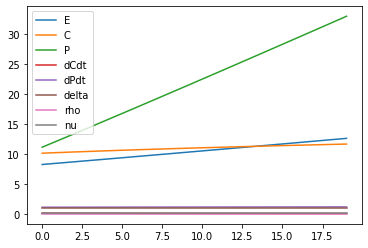

In [29]:
df.plot()